In [23]:
#Lets first do the imports
import pandas as pd
import seaborn as sns
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#Lets take a look at the dataset
df = pd.read_csv("iris-data.csv", na_values =["NA"])

In [25]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [27]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,NaN
50%,5.700000,3.000000,4.350000,NaN
75%,6.400000,3.300000,5.100000,NaN
max,7.900000,4.400000,6.900000,2.500000


In [31]:
df["class"].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [39]:
def classfunction(x) :
    if x =='Iris-setossa':
        x = 'Iris-setosa'
    elif x == 'versicolor':
        x = 'Iris-versicolor'
    else:
        pass
    return x

In [48]:
df["class"] = df["class"].apply(classfunction)

In [49]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

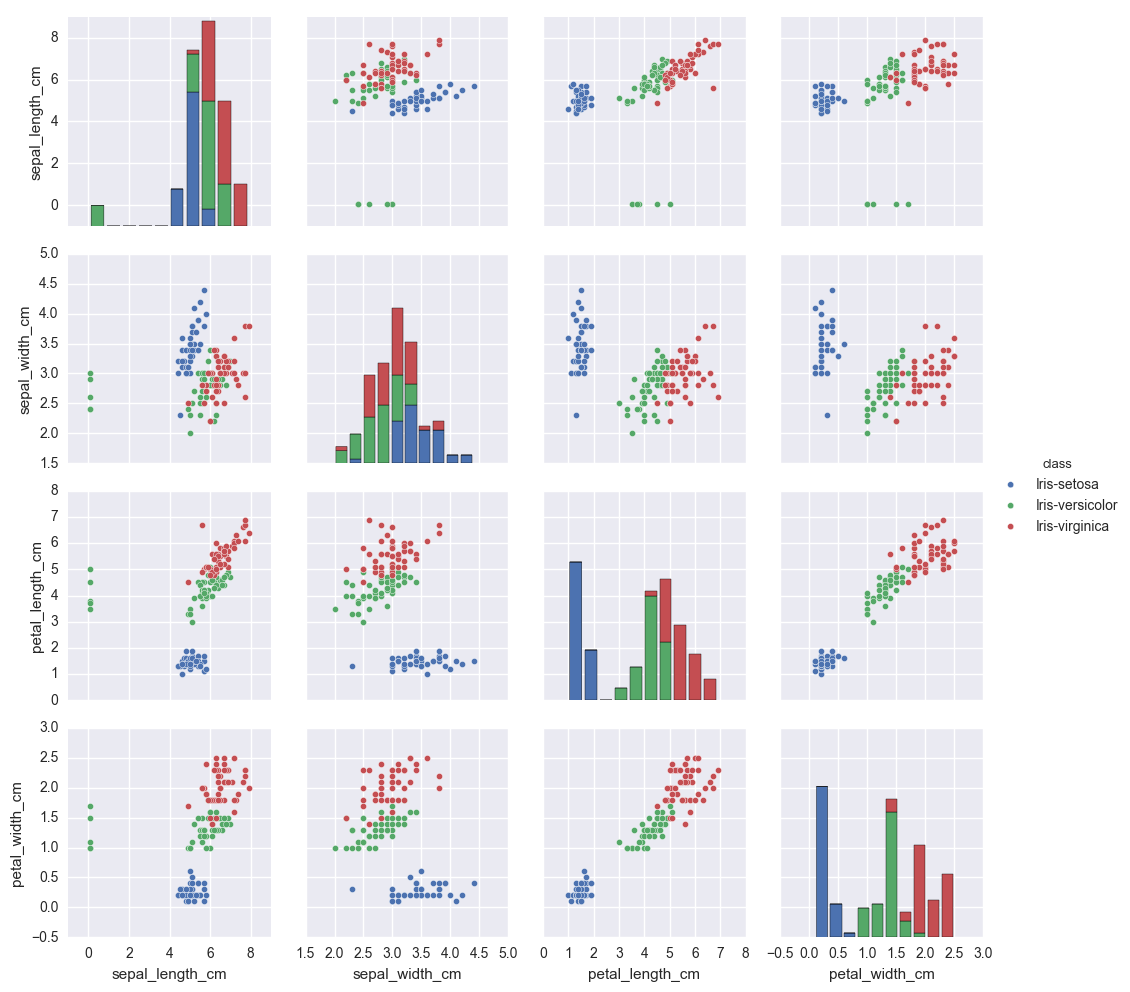

In [50]:
# We have to temporarily drop the rows with 'NA' values
# because the Seaborn plotting function does not know
# what to do with them
sns.pairplot(df.dropna(), hue='class')

In [75]:
df = df.loc[(df['class'] != 'Iris-setosa') | (df['sepal_width_cm'] >= 2.5)]

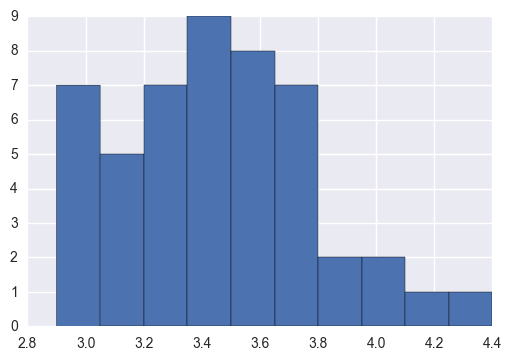

In [76]:
df.loc[df['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [78]:
df.loc[(df['class'] == 'Iris-versicolor') &
              (df['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor


In [79]:
df.loc[(df['class'] == 'Iris-versicolor') &
              (df['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

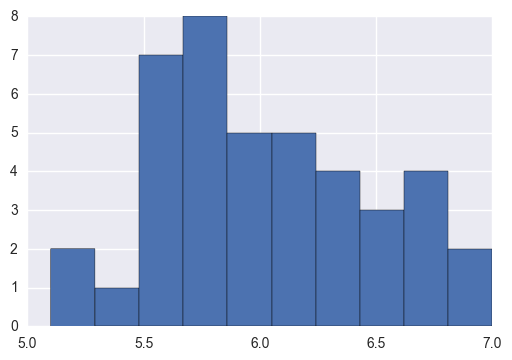

In [83]:
df.loc[df["class"]== "Iris-versicolor", "sepal_length_cm"].hist()

In [90]:
df.loc[(df["petal_width_cm"].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


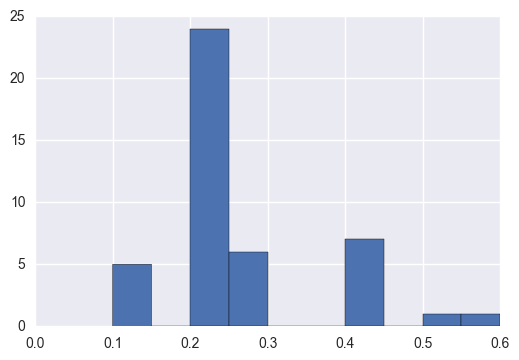

In [91]:
df.loc[(df["class"]=="Iris-setosa"),'petal_width_cm'].hist()

In [92]:
df.loc[(df["class"]=="Iris-setosa"),'petal_width_cm'].mean()

0.24999999999999997

In [93]:
df.loc[(df["petal_width_cm"].isnull()),"petal_width_cm"] = 0.25

In [95]:
df.to_csv('iris-data-clean.csv', index=False)

df_clean = pd.read_csv('iris-data-clean.csv')

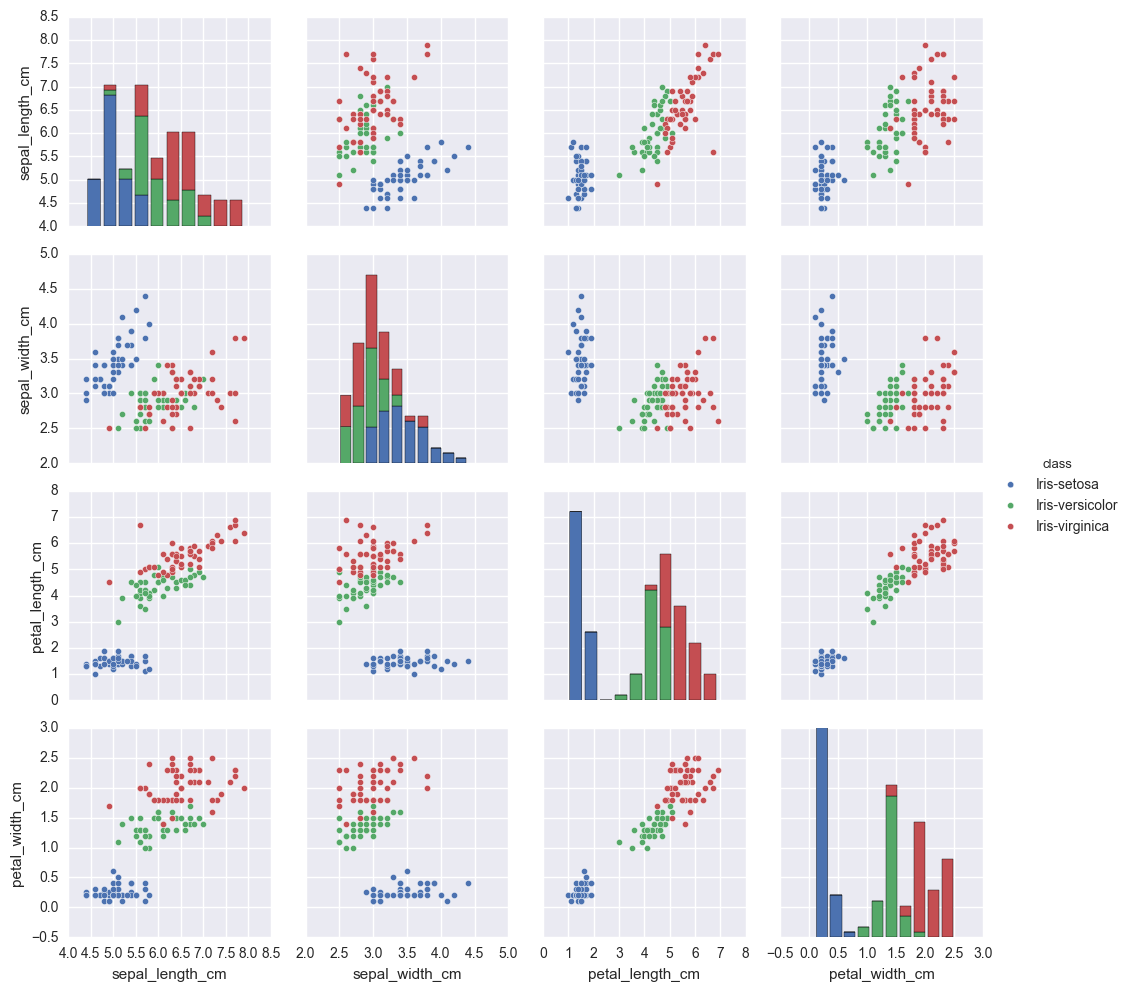

In [96]:
sns.pairplot(df_clean, hue ="class")

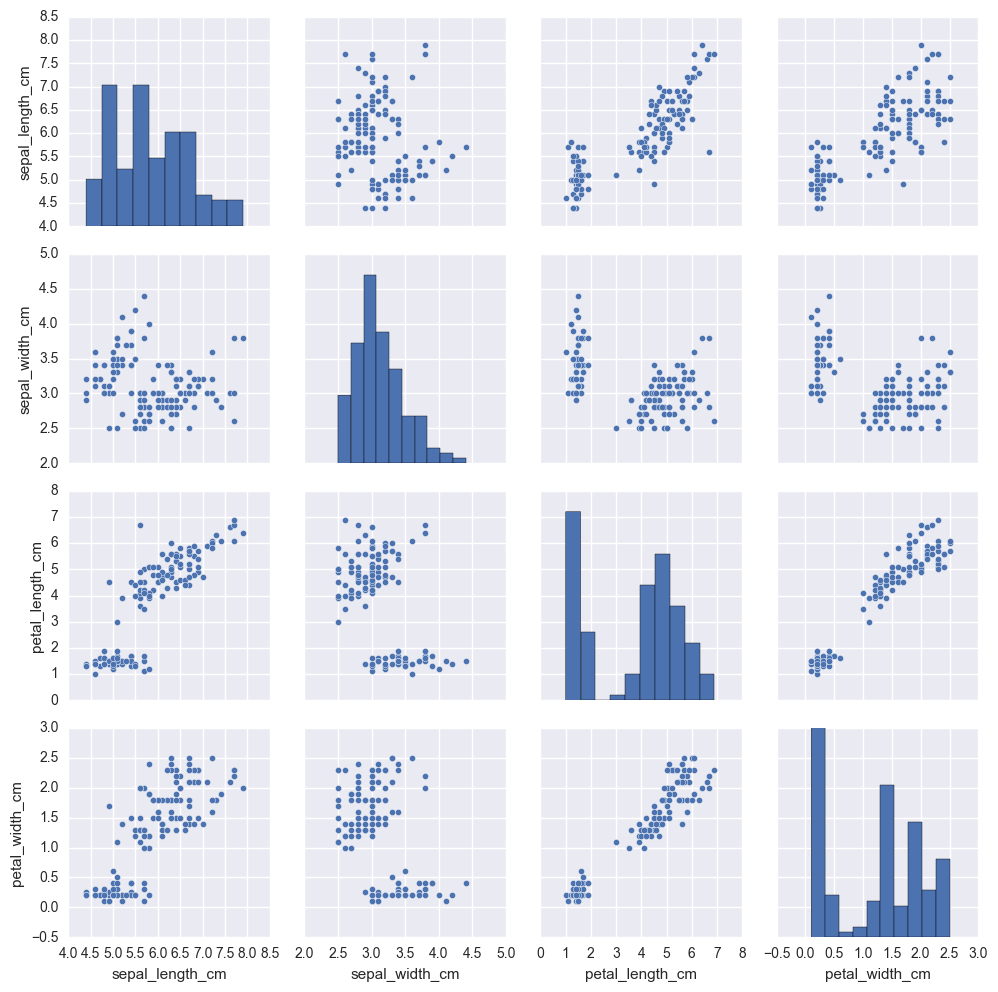

In [97]:
sns.pairplot(df_clean)

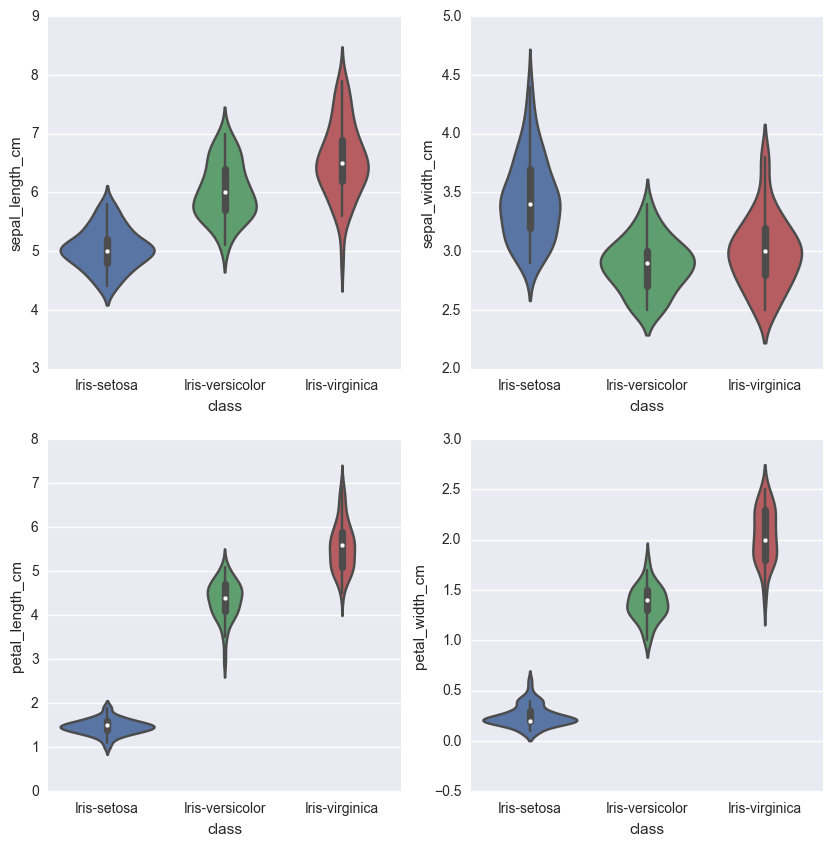

In [108]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(df_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='class', y=column, data=df_clean)

In [115]:
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the classes
all_classes = iris_data_clean['class'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_classes[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])